In [22]:
import glob

import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from unseen import fileio

In [2]:
#agcd_file = '/g/data/ia39/agcd/post-processed/data/agcd_v2_precip_total_cafe-grid_monthly_1900-2020.zarr.zip'
agcd_files = glob.glob('/g/data/zv2/agcd/v2/precip/total/r005/01month/agcd_v2_precip_total_r005_month*.nc')
agcd_files.sort()
agcd_files

['/g/data/zv2/agcd/v2/precip/total/r005/01month/agcd_v2_precip_total_r005_monthly_1900.nc',
 '/g/data/zv2/agcd/v2/precip/total/r005/01month/agcd_v2_precip_total_r005_monthly_1901.nc',
 '/g/data/zv2/agcd/v2/precip/total/r005/01month/agcd_v2_precip_total_r005_monthly_1902.nc',
 '/g/data/zv2/agcd/v2/precip/total/r005/01month/agcd_v2_precip_total_r005_monthly_1903.nc',
 '/g/data/zv2/agcd/v2/precip/total/r005/01month/agcd_v2_precip_total_r005_monthly_1904.nc',
 '/g/data/zv2/agcd/v2/precip/total/r005/01month/agcd_v2_precip_total_r005_monthly_1905.nc',
 '/g/data/zv2/agcd/v2/precip/total/r005/01month/agcd_v2_precip_total_r005_monthly_1906.nc',
 '/g/data/zv2/agcd/v2/precip/total/r005/01month/agcd_v2_precip_total_r005_monthly_1907.nc',
 '/g/data/zv2/agcd/v2/precip/total/r005/01month/agcd_v2_precip_total_r005_monthly_1908.nc',
 '/g/data/zv2/agcd/v2/precip/total/r005/01month/agcd_v2_precip_total_r005_monthly_1909.nc',
 '/g/data/zv2/agcd/v2/precip/total/r005/01month/agcd_v2_precip_total_r005_monthl

In [23]:
agcd_ds = fileio.open_dataset(agcd_files,
                              variables=['precip'],
                              shapefile='australia.zip',
                              spatial_agg='mean',
                              time_freq='A-DEC',
                              time_agg='mean',
                              input_freq='M')

In [10]:
agcd_ds = agcd_ds.squeeze(drop=True)

In [11]:
agcd_ds

<xarray.Dataset>
Dimensions:  (time: 121)
Coordinates:
  * time     (time) object 1900-12-31 00:00:00 ... 2020-12-31 00:00:00
Data variables:
    precip   (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes: (12/33)
    geospatial_lat_min:        -44.525
    geospatial_lat_max:        -9.975
    geospatial_lon_min:        111.975
    geospatial_lon_max:        156.275
    time_coverage_start:       1900-01-01T00:00:00
    date_created:              2020-08-27T21:49:15.867624
    ...                        ...
    licence:                   Data Licence: The grid data files in this AGCD...
    description:               This AGCD data is a snapshot of the operationa...
    date_issued:               2020-12-14 00:36:44
    attribution:               Data should be cited as : Australian Bureau of...
    copyright:                 (C) Copyright Commonwealth of Australia 2020, ...
    history:

In [ ]:
# TODO: Write to file without the temporal aggregation

## Remember that the units in the AGCD data are mm/month

In [24]:
#agcd_df = agcd_ds['precip'].to_dataframe()

years = agcd_ds['time'].dt.year.values
agcd_df = pd.DataFrame(index=years)
agcd_df['precip'] = agcd_ds['precip'].values

In [25]:
agcd_df

,precip
1900,31.729995
1901,33.704558
1902,26.833432
1903,43.718703
1904,42.513395
...,...
2016,44.706877
2017,41.475309
2018,34.058669
2019,23.124299


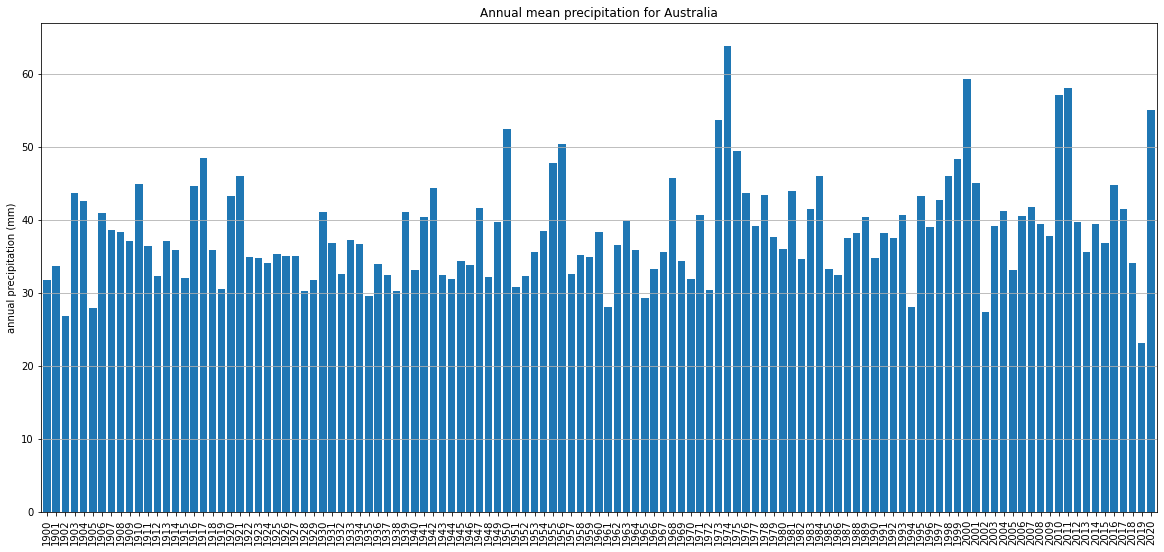

In [26]:
agcd_df['precip'].plot.bar(figsize=[20, 9], width=0.8)
#plt.axhline(mean_rainfall, color='0.5', linestyle='--')
plt.ylabel('annual precipitation (mm)')
plt.title(f'Annual mean precipitation for Australia')
plt.grid(axis='y')
plt.show()

2019 was the driest year on record for Australia. Do the example UNSEEN analysis on that.